from course: [https://openclassrooms.com/fr/courses/4444646-entrainez-un-modele-predictif-lineaire/4507811-tp-comparez-le-comportement-du-lasso-et-de-la-regression-ridge]()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
raw_data = pd.read_csv('TP_1_prostate_dataset.txt', delimiter='\t')

In [3]:
X_train = raw_data.iloc[:60,1:-3]
y_train = raw_data.iloc[:60,-2]
X_test = raw_data.iloc[60:,1:-3]
y_test = raw_data.iloc[60:,-2]

In [4]:
from sklearn import linear_model
import numpy as np

# On crée un modèle de régression linéaire
lr = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr.fit(X_train,y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)

print(baseline_error)

2.8641499657014404


## Apply Ridge Regression

In this case, we have to find a corelation factor, to lower the standard error --> i's the $ alpha $ coeficient



In [5]:
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

In [6]:
from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs = []
errors = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    errors.append([baseline_error, np.mean((ridge.predict(X_test) - y_test) ** 2)])

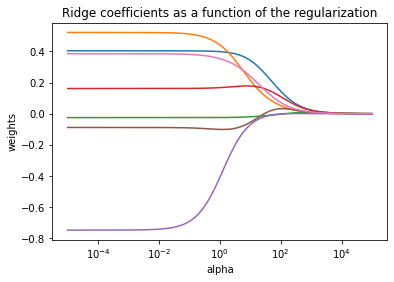

In [7]:
import matplotlib.pyplot as plt

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

Comme on peut le voir (et comme c'était prévu), la valeur de alpha diminue les poids de tous les paramètres de la régression. Etudions maintenant la valeur de l'erreur quadratique

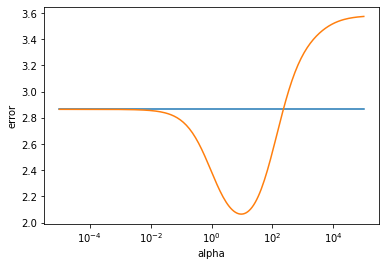

In [8]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [9]:
min(errors)[1]

2.064827060795023

Crest mieux que la baseline error

> Pour effectuer une cross validation de la régression ridge, vous pouvez utiliser la fonction `sklearn.linear_model.RidgeCV`

## Lasso Regression

In [10]:
n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_error, np.mean((lasso.predict(X_test) - y_test) ** 2)])

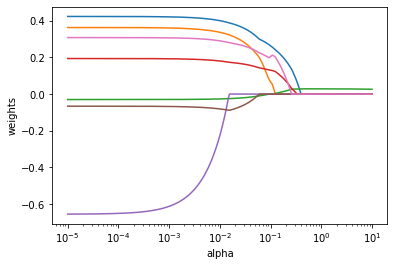

In [11]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

Comme on peut le voir, le lasso permet de supprimer des variables en mettant leur poids à zéro. C'est le cas si deux variables sont corrélées. L'une sera sélectionnée par le Lasso, l'autre supprimée. C'est aussi son avantage par rapport à une régression ridge qui ne fera pas de sélection de variables.

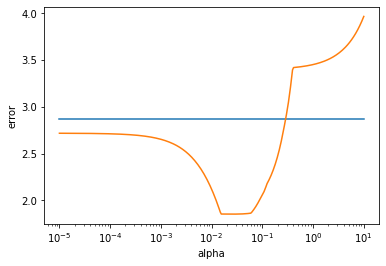

In [12]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [13]:
min(errors)[1]

1.8531561201728362

On fait encore mieux qu'avec la régression ridge! En effet comme vu dans les chapitres précédents, le lasso a pour avantage de pouvoir sélectionner un sous-ensemble des variables explicatives afin de permettre une meilleur généralisation.

> `sklearn.linear_model.LassoCV` permet d'effectuer une recherche des hyperparamètres de manière automatisée

## Conclusion

Avec ce TP vous avez pu mettre en oeuvre de manière pratique la régression ridge et le lasso. La régularisation fonctionne bien dans les deux cas, et permet de réduire l'erreur totale du modèle à l'aide de l'ajout du biais qui quantifie la complexité. L'un diminue grandement l'influence de certaines variables sur le modèle tandis que l'autre peut directement les supprimer (mettre leur poids à zéro), et donc être parcimonieux.